In [ ]:
#Importer les librairies necessaires:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [ ]:
#Importer le dataset "BilletsBanque"
df = pd.read_excel('trafics.xls')
df.head()

,Réseau,Station,Trafic,Ville,Arrondissement pour Paris
0,Métro,SAINT-LAZARE,45309544,Paris,8
1,Métro,GARE DE LYON,35926081,Paris,12
2,Métro,GARE DE L'EST,20377794,Paris,10
3,Métro,BASTILLE,13438906,Paris,12
4,Métro,BARBES-ROCHECHOUART,9174366,Paris,18


In [ ]:
df['Trafic'] = df['Trafic'].apply(int)

In [ ]:
df.describe()

,Trafic,Arrondissement pour Paris
count,4.428000e+03,4428.000000
mean,4.815511e+06,8.289973
std,5.895115e+06,6.958648
min,1.748930e+05,0.000000
25%,2.176466e+06,0.000000
50%,3.408172e+06,9.000000
75%,5.235722e+06,15.000000
max,5.079380e+07,20.000000


In [ ]:
for i in range (len(df)):
  if (df['Trafic'][i])<3415511 :
       df['Trafic'][i]=0
  else : 
    df['Trafic'][i]=1

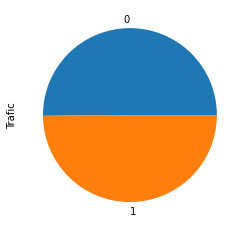

In [ ]:
df['Trafic'].value_counts().plot.pie()
plt.show()

In [ ]:
df=df.drop(['Ville','Station'], axis=1)

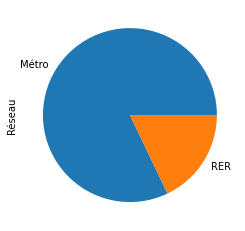

In [ ]:
df['Réseau'].value_counts().plot.pie()
plt.show()

In [ ]:
for i in df.index:
    if df["Réseau"][i]=="Métro":
        df["Réseau"][i]="0"
    else :
      df["Réseau"][i]="1"
df['Réseau'] = df['Réseau'].apply(int)

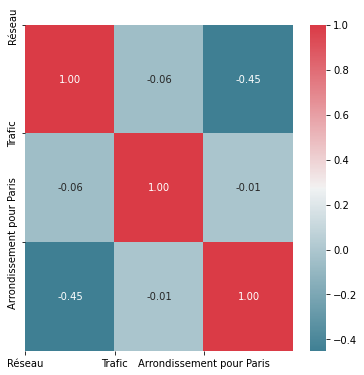

In [ ]:
import seaborn as sns
#graphique - croisement deux à deux des variables
#Create Correlation matrix
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(6,6))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

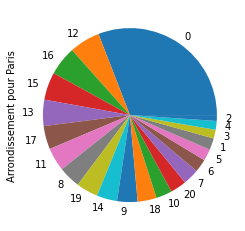

In [ ]:
df['Arrondissement pour Paris'].value_counts().plot.pie()
plt.show()

In [ ]:
for i in df.index:
    if df["Arrondissement pour Paris"][i]==0 :
        df["Arrondissement pour Paris"][i]="0"
    else :
      df["Arrondissement pour Paris"][i]="1"
df['Réseau'] = df['Réseau'].apply(int)

In [ ]:
df.dtypes

Réseau                       int64
Trafic                       int64
Arrondissement pour Paris    int64
dtype: object

In [ ]:
#dimensions : nombre de lignes, nombre de colonnes
df.shape

(4428, 3)

In [ ]:
# Pas de valeurs manquantes
df.isna().sum()

Réseau                       0
Trafic                       0
Arrondissement pour Paris    0
dtype: int64

In [ ]:
# diviser les données en attributs et étiquettes (labes)
X = df.drop("Trafic", axis=1)
y = df["Trafic"]

In [ ]:
# diviser les données en 80% training set  et 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Params par défaut

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [ ]:
#Entrainer le modèle svm
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
# Evaluer les performances du modèle

In [ ]:
from sklearn.metrics import classification_report
y_pred_svc_1 = svm.predict(X_test)
print(classification_report(y_pred_svc_1, y_test))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62       467
           1       0.58      0.60      0.59       419

    accuracy                           0.61       886
   macro avg       0.61      0.61      0.61       886
weighted avg       0.61      0.61      0.61       886



### Noyeau linéaire

In [ ]:
# Kernel linéaire
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_2 = svm.predict(X_test)
print(classification_report(y_pred_svc_2, y_test))

              precision    recall  f1-score   support

           0       0.68      0.58      0.62       536
           1       0.47      0.58      0.52       350

    accuracy                           0.58       886
   macro avg       0.57      0.58      0.57       886
weighted avg       0.60      0.58      0.58       886



### Noyeau polynomial

In [ ]:
# Kernel poly
svm = SVC(kernel="poly")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_3 = svm.predict(X_test)
print(classification_report(y_pred_svc_3, y_test))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69       869
           1       0.04      1.00      0.08        17

    accuracy                           0.54       886
   macro avg       0.52      0.76      0.38       886
weighted avg       0.98      0.54      0.68       886



### Noyeau Sigmoide

In [ ]:
# Kernel sigmoid
svm = SVC(kernel="sigmoid")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_4 = svm.predict(X_test)
print(classification_report(y_pred_svc_4, y_test))

              precision    recall  f1-score   support

           0       0.61      0.52      0.56       532
           1       0.41      0.49      0.45       354

    accuracy                           0.51       886
   macro avg       0.51      0.51      0.50       886
weighted avg       0.53      0.51      0.52       886



Nous pouvons conclure que les données suivent une forme polynomiale plus qu'une forme linéaire.

### Noyeau Gaussien RBF

In [ ]:
# Kernel rbf (Par défaut)
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62       467
           1       0.58      0.60      0.59       419

    accuracy                           0.61       886
   macro avg       0.61      0.61      0.61       886
weighted avg       0.61      0.61      0.61       886



### Avec GridSearchCV

Nous allons faire varier les paramétres C et gamma en plus.

gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.


C:Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. 

In [ ]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [ ]:
print("Meilleurs paramétres trouvés par GridSeachCV")
print(grid.best_params_)

Meilleurs paramétres trouvés par GridSeachCV
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


# Comparaison des résultats

## Tableau comparatif

Nous allons maintenant

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# On va afficher un tableau qui ordonne les modèles du plus performant au moins performant suivant le score
s1=accuracy_score(y_test, y_pred_svc_1)
s2=accuracy_score(y_test, y_pred_svc_2)
s3=accuracy_score(y_test, y_pred_svc_3)
s4=accuracy_score(y_test, y_pred_svc_4)

models = pd.DataFrame({
    'Model': ['Support Vector Machines RBF', 'Support Vector Machines Linaire','Support Vector Machines polynomiale',
              'Support Vector Machines sigmoïde'],
    'Score': [s1,s2, s3, 
              s4]})
models.sort_values(by="Score",ascending=False)

,Model,Score
0,Support Vector Machines RBF,0.608352
1,Support Vector Machines Linaire,0.577878
2,Support Vector Machines polynomiale,0.536117
3,Support Vector Machines sigmoïde,0.510158
